In [1]:
# https://people.duke.edu/~ccc14/sta-663/PyMC2.html



In [33]:
dose = np.asarray([-0.896, -0.296, -0.053, 0.727])
rats = np.asarray([5,5,5,5])
deaths = np.asarray([0,1,3,5])


In [31]:
import pymc
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import spacepy.plot as spp

This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


We will model the number of deaths as a random sample from a binomial distribution, where $n$ is the number of rats and $p$ the probabbility of a rat dying. We are given $n=5$, but we believve that $p$ may be related to the drug dose $x$. As $x$ increases the number of rats dying seems to increase, and since $p$ is a probability, we use the following model:

$
y \sim Bin(n,p) \\
logit(p) = \alpha + \beta x \\
a \sim N(0,5) \\
\beta \sim N(0,10)
$


where we set vague priors for αα and ββ, the parameters for the logistic model.

In [15]:
# define invlogit function
def invlogit(x):
    return pymc.exp(x) / (1 + pymc.exp(x))

In [22]:
# observed data
dose, rats, deaths

# define priors
alpha = pymc.Normal('alpha', mu=0, tau=1.0/5**2)
beta = pymc.Normal('beta', mu=0, tau=1.0/10**2)

# define likelihood
p = pymc.InvLogit('p', alpha + beta*dose)
y = pymc.Binomial('y_obs', n=rats, p=p, value=deaths, observed=True)

# inference
m = pymc.Model([alpha, beta, y])
mc = pymc.MCMC(m)
mc.sample(iter=21000, burn=1000, burn_till_tuned=True, thin=20)

 [------------------107%------------------] 26920 of 25000 complete in 3.5 sec

Plotting beta
Plotting alpha


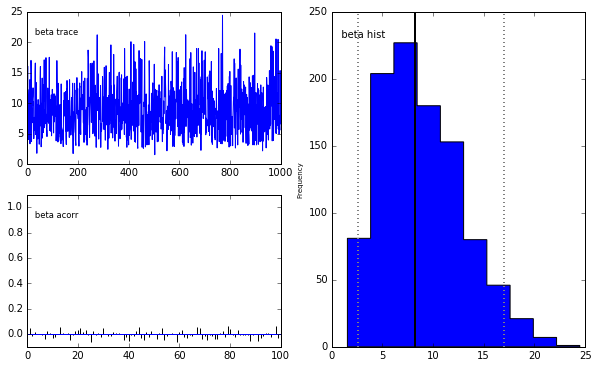

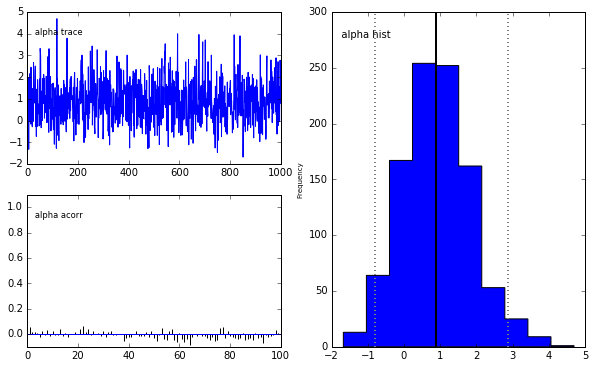

In [23]:
pymc.Matplot.plot(mc)

In [24]:
pprint(mc.stats())

{'alpha': {'95% HPD interval': array([-0.78835151,  2.86049269]),
           'mc error': 0.031242258562896912,
           'mean': 0.9028634849005045,
           'n': 1000,
           'quantiles': {2.5: -0.76295241998957608,
                         25: 0.24710440166522507,
                         50: 0.87641460106084002,
                         75: 1.5087394017761016,
                         97.5: 2.9396943127800568},
           'standard deviation': 0.93262091242629819},
 'beta': {'95% HPD interval': array([  2.60685807,  16.99616342]),
          'mc error': 0.13245308874746578,
          'mean': 8.9266014068551485,
          'n': 1000,
          'quantiles': {2.5: 2.9927171663704488,
                        25: 5.8512321460104024,
                        50: 8.2701885554789278,
                        75: 11.381765674809385,
                        97.5: 18.354248922132154},
          'standard deviation': 3.9590448002851963}}


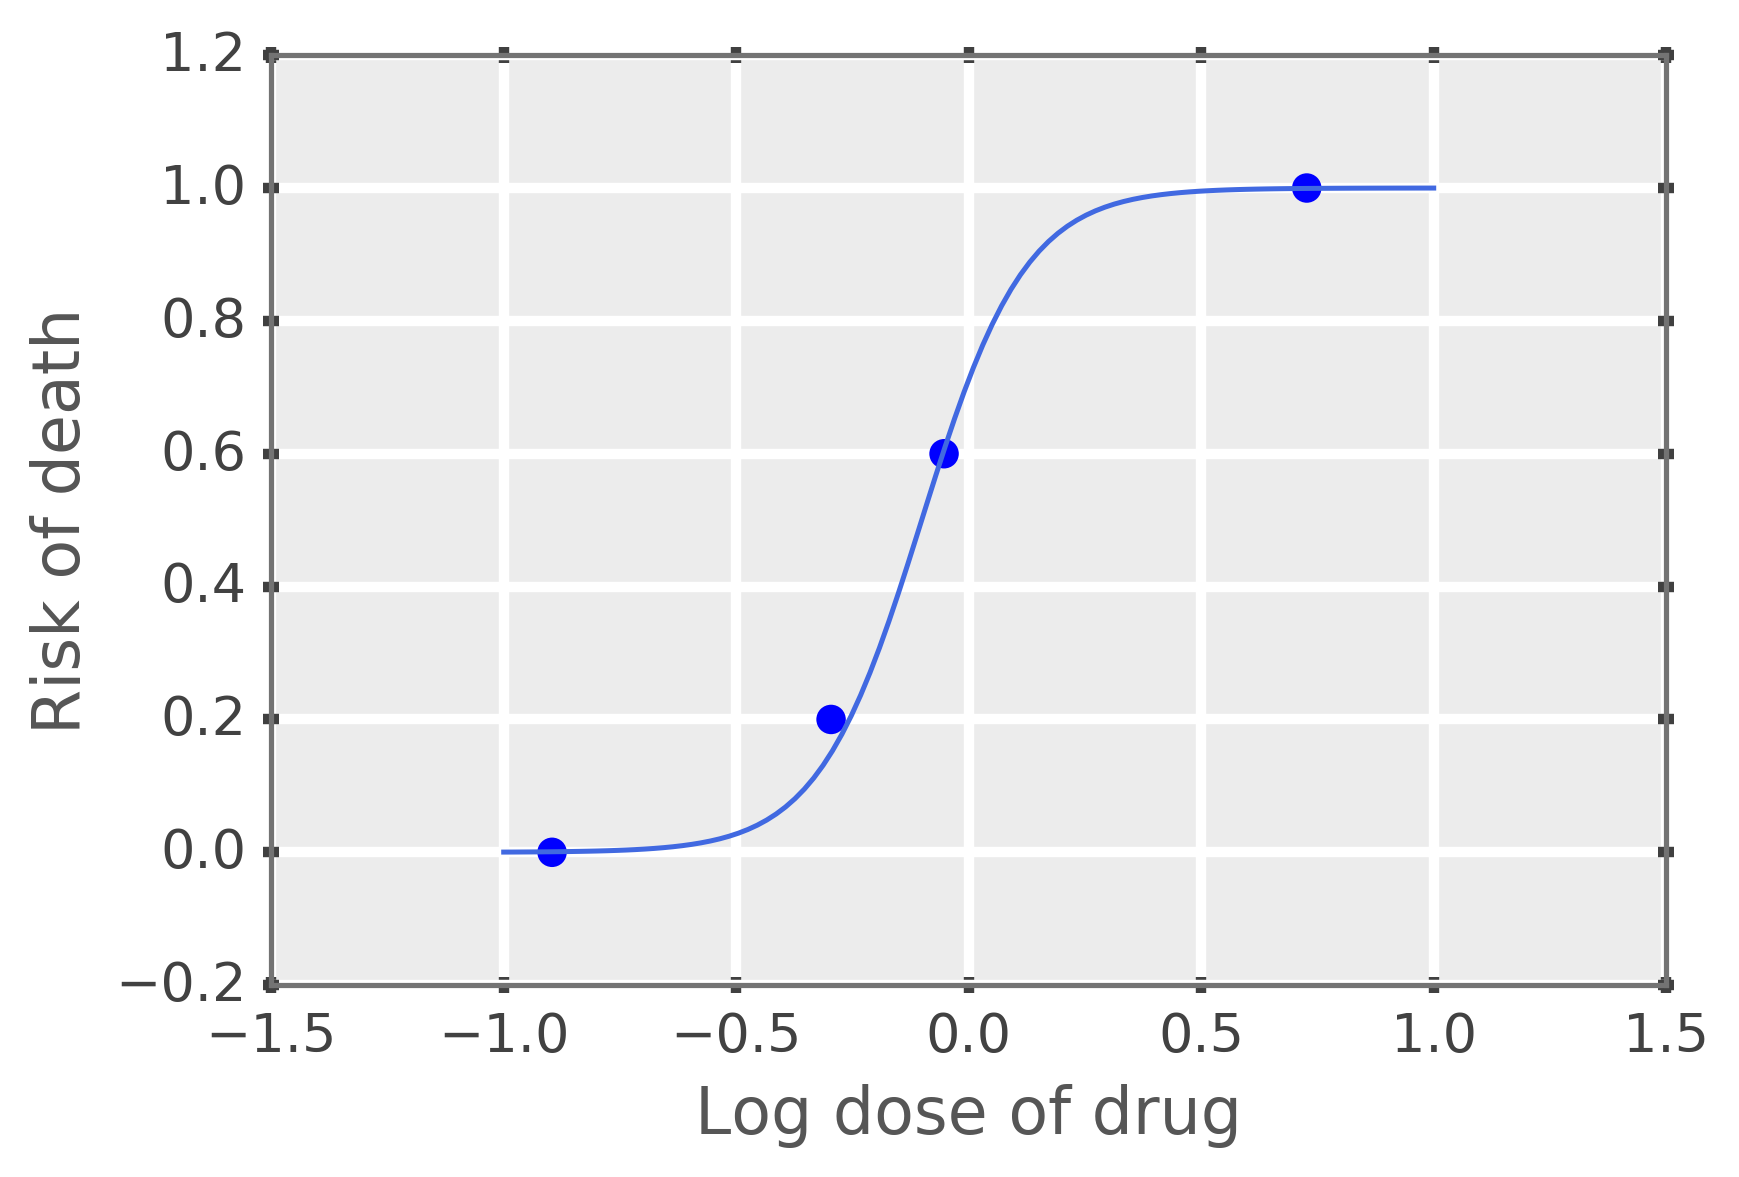

In [38]:
xp = np.linspace(-1, 1, 100)
a = alpha.stats()['mean']
b = beta.stats()['mean']
plt.plot(xp, invlogit(a + b*xp).value)
plt.scatter(dose, deaths/5, s=50);
plt.xlabel('Log dose of drug')
plt.ylabel('Risk of death')

In [56]:
# one should be able to get estimates of the line uncertainity
ilu = np.empty((1000, len(xp)), dtype=float)
for ii, v in enumerate(np.random.random_integers(0, len(alpha.trace[:])-1, 1000)):
    ilu[ii] = invlogit(alpha.trace[:][v] + beta.trace[:][v]*xp).value


In [57]:
ilu

array([[  1.59607441e-02,   1.75955462e-02,   1.93944951e-02, ...,
          9.95924052e-01,   9.96307469e-01,   9.96654941e-01],
       [  3.72511495e-07,   5.13173950e-07,   7.06951311e-07, ...,
          9.99999914e-01,   9.99999938e-01,   9.99999955e-01],
       [  2.04260697e-06,   2.61947104e-06,   3.35924998e-06, ...,
          9.99983745e-01,   9.99987325e-01,   9.99990116e-01],
       ..., 
       [  3.58890019e-05,   4.58834136e-05,   5.86609174e-05, ...,
          9.99998755e-01,   9.99999026e-01,   9.99999238e-01],
       [  1.71383727e-04,   2.10003349e-04,   2.57323280e-04, ...,
          9.99984025e-01,   9.99986964e-01,   9.99989361e-01],
       [  1.46800456e-02,   1.58462849e-02,   1.71035664e-02, ...,
          9.65231583e-01,   9.67744793e-01,   9.70081968e-01]])

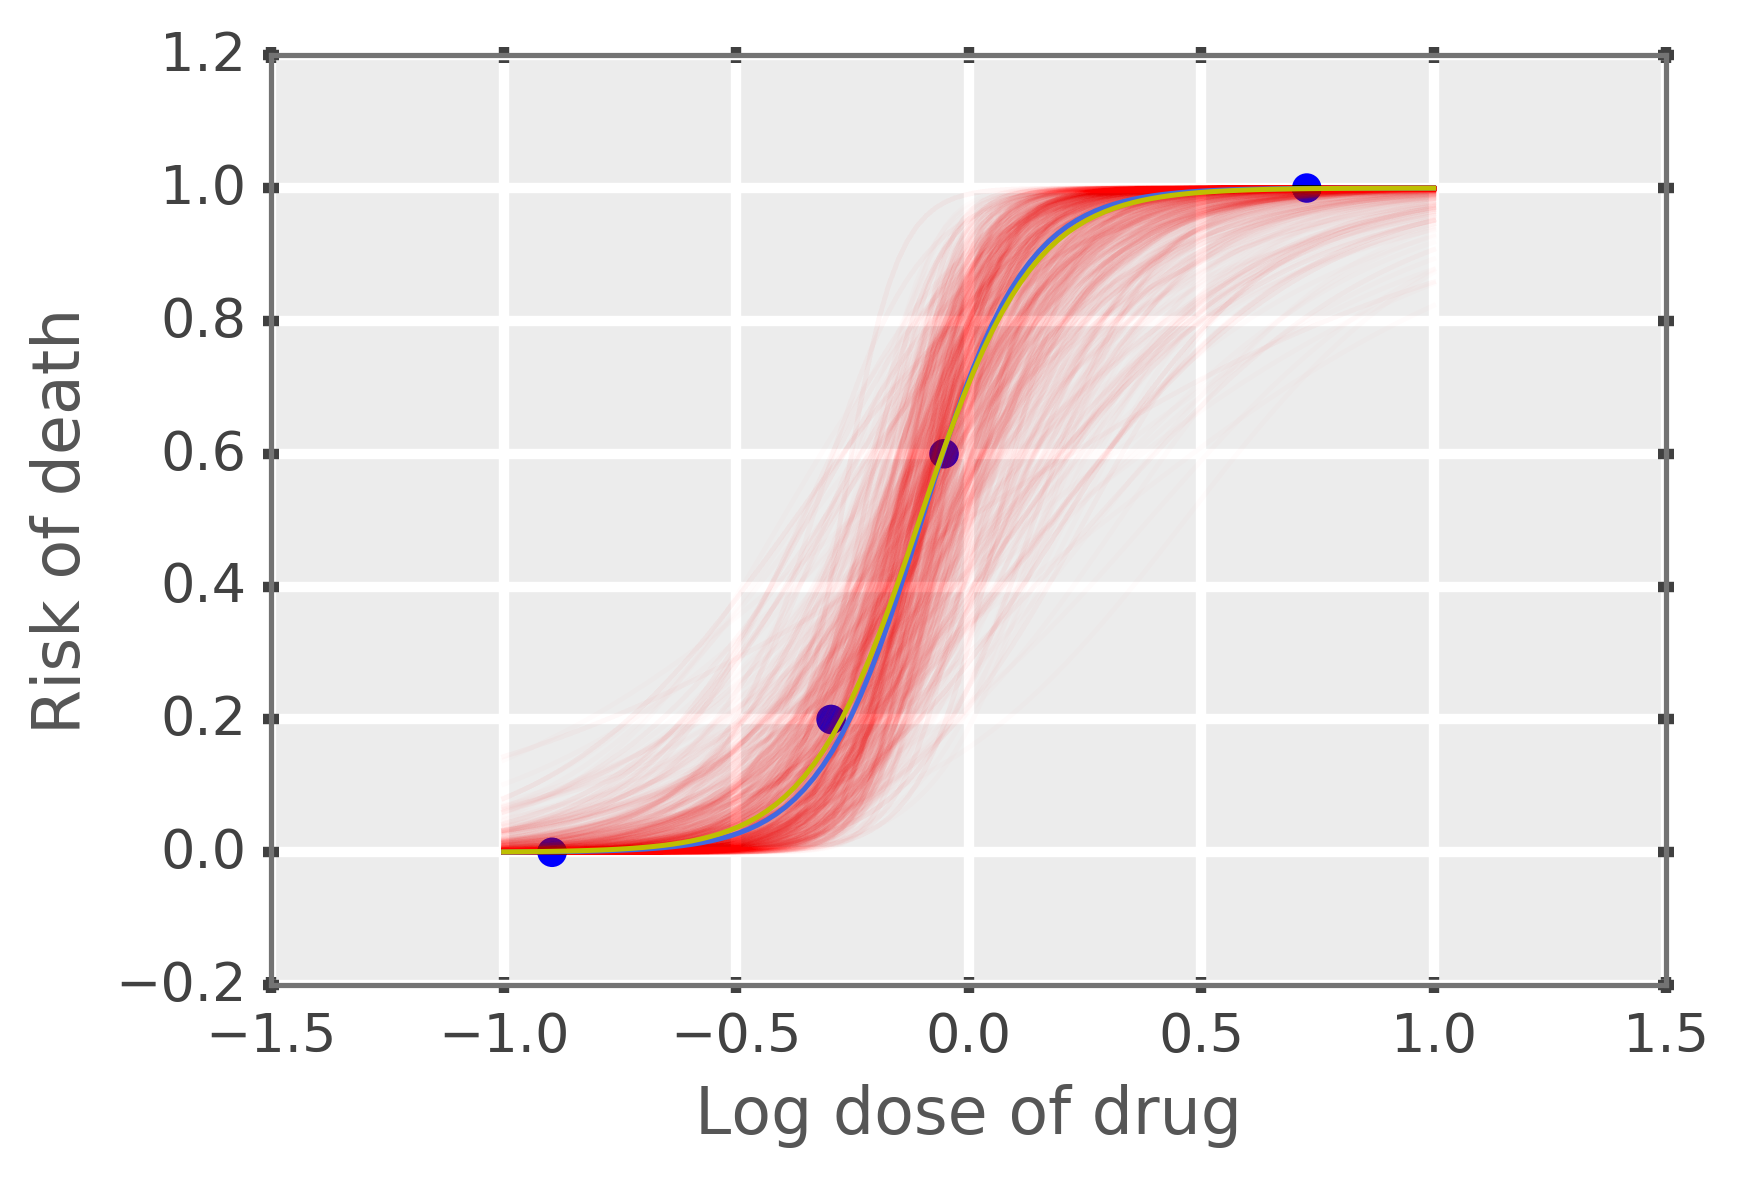

In [64]:
xp = np.linspace(-1, 1, 100)
for v in ilu:
    plt.plot(xp, v, alpha=.01, c='r')


a = alpha.stats()['mean']
b = beta.stats()['mean']
plt.plot(xp, invlogit(a + b*xp).value)

a = alpha.stats()['quantiles'][50]
b = beta.stats()['quantiles'][50]
plt.plot(xp, invlogit(a + b*xp).value, c='y')


plt.scatter(dose, deaths/5, s=50);
plt.xlabel('Log dose of drug')
plt.ylabel('Risk of death')

In [63]:
alpha.stats()

{'95% HPD interval': array([-0.78835151,  2.86049269]),
 'mc error': 0.031242258562896912,
 'mean': 0.9028634849005045,
 'n': 1000,
 'quantiles': {2.5: -0.76295241998957608,
  25: 0.24710440166522507,
  50: 0.87641460106084002,
  75: 1.5087394017761016,
  97.5: 2.9396943127800568},
 'standard deviation': 0.93262091242629819}